In [2]:
%matplotlib inline
import random
import tensorflow as tf
from d2l import tensorflow as d2l

In [3]:
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = tf.zeros((num_examples, w.shape[0]))
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1, 1))
    return X, y

true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [4]:
print('features:', features[0],'\nlabel:', labels[0])

features: tf.Tensor([-1.9000856 -0.5008151], shape=(2,), dtype=float32) 
label: tf.Tensor([2.1007931], shape=(1,), dtype=float32)


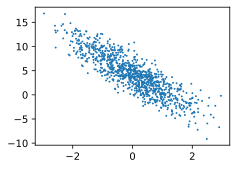

In [5]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].numpy(), labels.numpy(), 1);

In [7]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i: min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels, j)

In [10]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tf.Tensor(
[[-1.0839494  -0.8121865 ]
 [-0.6448204   0.9890487 ]
 [-0.681518   -1.5810272 ]
 [-0.48295197  0.22195831]
 [-0.3455425  -0.3717968 ]
 [ 0.48352003 -1.3152851 ]
 [-1.9680989  -1.6637442 ]
 [-2.1376307  -0.07493097]
 [ 0.95547676 -0.3181778 ]
 [-0.15653029  0.4469489 ]], shape=(10, 2), dtype=float32) 
 tf.Tensor(
[[ 4.7971983 ]
 [-0.4505291 ]
 [ 8.197891  ]
 [ 2.4943404 ]
 [ 4.772455  ]
 [ 9.630683  ]
 [ 5.92171   ]
 [ 0.16676363]
 [ 7.18783   ]
 [ 2.3600488 ]], shape=(10, 1), dtype=float32)


In [11]:
w = tf.Variable(tf.random.normal(shape=(2, 1), mean=0, stddev=0.01),
                trainable=True)
b = tf.Variable(tf.zeros(1), trainable=True)

In [13]:
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return tf.matmul(X, w) + b

In [15]:
def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - tf.reshape(y, y_hat.shape)) ** 2 / 2

In [17]:
def sgd(params, grads, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    for param, grad in zip(params, grads):
        param.assign_sub(lr*grad/batch_size)

In [18]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as g:
            l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 计算l关于[w,b]的梯度
        dw, db = g.gradient(l, [w, b])
        # 使用参数的梯度更新参数
        sgd([w, b], [dw, db], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')

epoch 1, loss 0.030677
epoch 2, loss 0.000109
epoch 3, loss 0.000050


In [19]:
print(f'w的估计误差: {true_w - tf.reshape(w, true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: [ 5.4156780e-04 -4.0769577e-05]
b的估计误差: [0.00107384]
